# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [16]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

%matplotlib inline

In [17]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [18]:
# Ajustando o primeiro modelo sem logaritmo
# O objetivo é entender como a porcentagem da gorjeta varia em relação ao valor da conta líquida.
#Neste código temos a variável tip_pct como dependente (alvo) e net_bill como independente
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg_summary = reg.summary()
reg_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.52e-06
Time:                        16:56:45   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Com a abordagem acima, obtivemos um R-squared de 0.091. Ou seja, somente cerca de 9.1% da variabilidade em tip_pct é explicada pela variável net_bill.

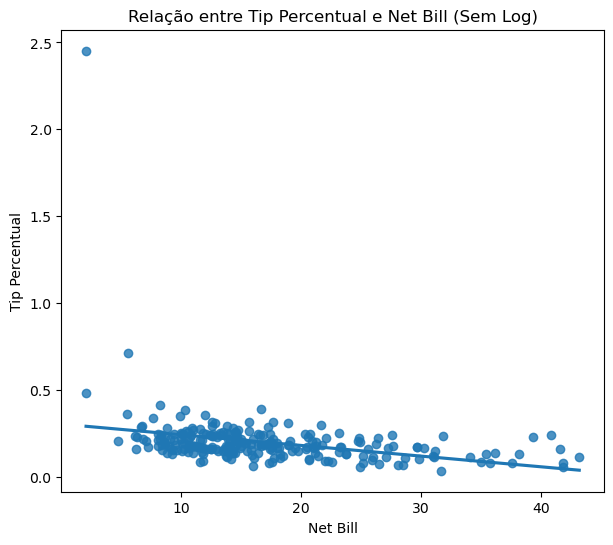

In [19]:
plt.figure(figsize=(7, 6))
sns.regplot(x='net_bill', y='tip_pct', data=tips, ci=None)
plt.title('Relação entre Tip Percentual e Net Bill (Sem Log)')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentual')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [20]:
# Calculando o logaritmo de 'net_bill' e ajustando o segundo modelo com logaritmo
tips['log_net_bill'] = np.log(tips['net_bill']) #usando a função do numpy np.log para logaritimizar a variável net_bill
log_reg = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()
log_reg_summary = log_reg.summary()

log_reg_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.62e-13
Time:                        16:56:45   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444      0.000       0.512       0.724
log_net_bill    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir da modificação (transformação logarítmica da variável net_bill) obtivemos uma melhora significativa em nosso resultado: R^2 de aproximadamente 0.202, o que significa que cerca de 20.2% da variabilidade em tip_pct é explicada pela variável log_net_bill.

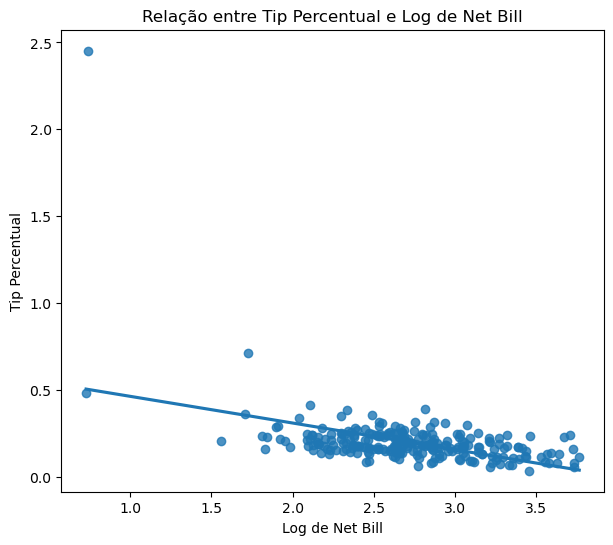

In [21]:
plt.figure(figsize=(7, 6))
sns.regplot(x='log_net_bill', y='tip_pct', data=tips, ci=None)
plt.title('Relação entre Tip Percentual e Log de Net Bill')
plt.xlabel('Log de Net Bill')
plt.ylabel('Tip Percentual')
plt.show()

Através dos dois gráficos de Regressões Lineares (sem e com transformação logarítmica) podemos observar uma tendência que a primeira vista parece contraintuitiva: conforme o valor da conta (net_bill) aumenta, há uma diminuição na porcentagem da gorjeta (pct_bill). 

Entendendo os efeitos da transformação logarítmica:

*Linearidade: A transformação logarítmica pode tornar a relação entre as variáveis mais próxima de uma relação linear, o que é ideal para a regressão linear.
*Variação Reduzida em Grandes Valores: Em muitos casos, dados como preços ou rendas têm uma distribuição assimétrica com alguns valores muito altos. O logaritmo ajuda a reduzir essa assimetria, tornando o modelo mais eficaz.
*Melhor Ajuste: Se a relação original entre as variáveis é não linear, a transformação logarítmica pode melhorar o ajuste do modelo, como indicado pelo aumento do R^2.
 

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [22]:
# Ajustando o modelo de regressão linear com tip_pct em função de um polinômio de segundo grau em net_bill
poly_reg = smf.ols('tip_pct ~ net_bill + I(net_bill**2)', data=tips).fit()

# Exibindo o resumo do modelo
poly_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.06e-09
Time:                        16:56:45   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
I(net_bill ** 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O R^2 foi de aproximadamente 0.158, sugerindo que cerca de 15.8% da variabilidade em tip_pct foi explicada pelo modelo.

Modelos polinomiais são úteis quando a relação entre as variáveis não é bem representada por uma linha reta (modelo linear). Adicionar um termo quadrático permite que o modelo capture curvaturas nos dados, como relações em forma de U ou parábolas

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [24]:
# Transformando 'tip_pct' em escala logarítmica
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Utilizando o modelo com 'tip_pct' em função de 'net_bill'
tip_pct_reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Ajustando o modelo logarítmico com 'log(tip_pct)' em função de 'net_bill'
log_tip_pct_reg = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

# Exibindo os resumos dos modelos e comparando os R-quadrados
tip_pct_summary = tip_pct_reg.summary()
log_tip_pct_summary = log_tip_pct_reg.summary()
r_squared_direct = tip_pct_reg.rsquared
r_squared_log = log_tip_pct_reg.rsquared

tip_pct_summary, log_tip_pct_summary, r_squared_direct, r_squared_log

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                tip_pct   R-squared:                       0.091
 Model:                            OLS   Adj. R-squared:                  0.088
 Method:                 Least Squares   F-statistic:                     24.31
 Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.52e-06
 Time:                        16:59:17   Log-Likelihood:                 108.00
 No. Observations:                 244   AIC:                            -212.0
 Df Residuals:                     242   BIC:                            -205.0
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

Análise:

Modelo Direto (tip_pct): Analisamos a relação entre a porcentagem da gorjeta (tip_pct) e o valor da conta líquida (net_bill) usando um modelo de regressão linear simples. Este modelo explica cerca de 9.1% da variabilidade em tip_pct.

Modelo Logarítmico (log_tip_pct): Também analisamos a mesma relação usando um modelo de regressão linear no logaritmo de tip_pct. Este modelo mostra um ajuste melhor, explicando aproximadamente 23.5% da variabilidade.

Conclusão:

O modelo logarítmico, apesar de mais complexo, oferece um melhor entendimento da relação entre tip_pct e net_bill, sugerindo que essa relação pode ser não linear.

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [25]:
# Ajustando o modelo com log(tip_pct) em função de log(net_bill)
# Tanto log_tip_pct e log_net_bill já foram definidas anteriormente neste botebook
log_log_reg = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

# Exibindo o resumo do modelo
log_log_reg_summary = log_log_reg.summary()

# Calculando as predições do modelo em escala logarítmica e transformando-as de volta
tips['pred_log_log_tip_pct'] = log_log_reg.fittedvalues
# Retornando os valores originais de 'tip_pct' com a função exp() do Numpy
tips['pred_tip_pct_from_log_log'] = np.exp(tips['pred_log_log_tip_pct'])

# Calculando o R-quadrado para 'tip_pct' com base nas predições transformadas do logaritmo
r_squared_tip_pct_from_log_log = r2_score(tips['tip_pct'], tips['pred_tip_pct_from_log_log'])

log_log_reg_summary, r_squared_tip_pct_from_log_log


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            log_tip_pct   R-squared:                       0.293
 Model:                            OLS   Adj. R-squared:                  0.291
 Method:                 Least Squares   F-statistic:                     100.5
 Date:                Sat, 30 Dec 2023   Prob (F-statistic):           5.20e-20
 Time:                        17:20:54   Log-Likelihood:                -96.357
 No. Observations:                 244   AIC:                             196.7
 Df Residuals:                     242   BIC:                             203.7
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

Modelo de regressão linear ajustado com ambas tip_pct e net_bill transformadas em logaritmo. R^2 de 0.293 para o modelo log-log, indicando que ele explica cerca de 29.3% da variabilidade na escala logarítmica.
Quando transformado de volta para a escala original, o R^2 é de aproximadamente 0.228, explicando cerca de 22.8% da variabilidade em tip_pct.
O modelo log-log capta melhor a relação entre tip_pct e net_bill do que modelos anteriores, sugerindo uma relação mais complexa.
Conclusão: O modelo log-log é mais eficaz para entender as relações complexas entre a porcentagem da gorjeta e o valor da conta líquida.

###  6. qual modelo resultou no melhor ajuste?

O modelo de regressão linear log-log, que transformou tanto a porcentagem da gorjeta (tip_pct) quanto o valor da conta líquida (net_bill) para a escala logarítmica, resultou no melhor ajuste.
O modelo log-log teve um R quadrado de 0.293 na escala logarítmica, o que significa que ele explica cerca de 29.3% da variabilidade no logaritmo da porcentagem da gorjeta.
Quando as predições foram transformadas de volta para a escala original, o R quadrado foi de aproximadamente 0.228, indicando que o modelo explica cerca de 22.8% da variabilidade na porcentagem da gorjeta original.
Este foi o melhor ajuste entre todos os modelos testados, superando os modelos diretos e os modelos com transformação logarítmica de apenas uma das variáveis.
Conclusão: O modelo log-log se mostrou mais eficaz para entender as relações complexas entre a porcentagem da gorjeta e o valor da conta líquida, especialmente ao considerar ambas as variáveis em uma escala logarítmica.
